<h1 align='center'>Um <i>tour</i> pelos classificadores de <i>Machine Learning</i> usando <i>Scikit-Learn</i></h1>
<p align='center'><img src=https://i0.wp.com/www.datageeks.com.br/wp-content/uploads/2019/06/Machine-Learning.jpg?fit=900%2C600&ssl=1 heigth=350 width=600></p>
<p align='justify'>Faremos um <i>tour</i> por uma sele√ß√£o de algoritmos de aprendizado de m√°quina populares e poderosos que s√£o comumente usados na academia e na ind√∫stria. Ao aprender sobre as diferen√ßas entre v√°rios algoritmos de aprendizado supervisionado para classifica√ß√£o, tamb√©m desenvolveremos uma aprecia√ß√£o de seus pontos fortes e fracos individuais. Al√©m disso, daremos nossos primeiros passos com a biblioteca <i>scikit-learn</i>, que oferece uma <i>interface</i> amig√°vel e consistente para usar esses algoritmos de forma eficiente e produtiva.</p>

<h2>Escolhendo um algoritmo de classifica√ß√£o</h2>
<p align='justify'>Escolher um algoritmo de classifica√ß√£o apropriado para uma tarefa de problema espec√≠fica requer <b>pr√°tica e experi√™ncia</b>, cada algoritmo tem suas pr√≥prias peculiaridades e √© baseado em certas suposi√ß√µes.</p>
<p align='justify'>Na pr√°tica, √© sempre recomend√°vel comparar o desempenho de pelo menos 3 ou 4 algoritmos de aprendizagem diferentes para selecionar o melhor modelo para o problema espec√≠fico. Eles podem diferir no n√∫mero de recursos ou exemplos, na quantidade de ru√≠do em um conjunto de dados e se as classes s√£o linearmente separ√°veis ou n√£o.</p>

<p align='justify'>Eventualmente, o desempenho de um classificador em termos de performance computacional bem como o seu poder preditivo, depende muito dos dados subjacentes que est√£o dispon√≠veis para o aprendizado. As cinco principais etapas envolvidas no treinamento, de acordo com <i>Sebastian Raschkal</i>, de um algoritmo de aprendizado de m√°quina supervisionado podem ser resumidas da seguinte forma:</p>
<ol>
<li>Selecionando recursos e coletando exemplos de treinamento rotulados.</li>
<li>Escolhendo uma m√©trica de desempenho.</li>
<li>Escolha de um classificador e algoritmo de otimiza√ß√£o.</li>
<li>Avalia√ß√£o do desempenho do modelo.</li>
<li>Ajustando o algoritmo.</li>
</ol>

<h2>Primeiros passos com scikit-learn ‚Äì treinando um perceptron</h2>
<p align='justify'>Vamos dar uma olhada na API <i>scikit-learn</i>, que combina uma interface amig√°vel e consistente com uma implementa√ß√£o altamente otimizada de v√°rios algoritmos de classifica√ß√£o. A biblioteca <i>scikit-learn</i> oferece n√£o apenas uma grande variedade de algoritmos de aprendizado, mas tamb√©m muitas fun√ß√µes convenientes para pr√©-processar dados e ajustar e avaliar nossos modelos.</p>
<p align='jsutify'>Para come√ßar com a biblioteca <i>scikit-learn</i>, treinaremos um modelo <i>perceptron</i>. Para simplificar, usaremos o j√° familiar conjunto de dados Iris. Convenientemente, o conjunto de dados Iris j√° est√° dispon√≠vel via <i>scikit-learn</i>, pois √© um conjunto de dados simples e popular, frequentemente usado para testar e experimentar algoritmos.</p> 

In [2]:
from sklearn import datasets
import numpy as np

# Carregando o dataset Iris 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
# 0 = Iris Setosa 
# 1 = Iris Versicolor
# 2 = Iris Virg√≠nica

Class labels: [0 1 2]


<p align='justify'>Embora muitas fun√ß√µes e m√©todos de classe do <i>scikit-learn</i> tamb√©m funcionem com r√≥tulos de classe em formato de <i>string</i>, o uso de r√≥tulos inteiros √© uma abordagem recomendada para evitar falhas t√©cnicas e melhorar o desempenho computacional devido ao uso de mem√≥ria menor; al√©m disso, codificar r√≥tulos de classe como inteiros √© uma conven√ß√£o comum entre a maioria das bibliotecas de aprendizado de m√°quina.</p>

In [3]:
# Dividindo os dados em 70% treinamento e 30% teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


<p align='justify'>Aproveitamos o suporte integrado para estratifica√ß√£o via <i>stratify=y</i>. Nesse contexto, estratifica√ß√£o significa que o m√©todo <i>train_test_split</i> retorna subconjuntos de treinamento e teste que t√™m as mesmas propor√ß√µes de r√≥tulos de classe que o conjunto de dados de entrada.</p>

In [4]:
# Padronizando as Caracter√≠sticas (normalizando)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<p align='justify'>Observe que usamos os mesmos par√¢metros de escala para padronizar o conjunto de dados de teste para que os valores no conjunto de dados de treinamento e de teste sejam compar√°veis entre si.</p>

In [5]:
# Treinando o Perceptron via scikit-learn
from sklearn.linear_model import Perceptron


ppn = Perceptron(eta0=0.1, random_state=1) # Instanciando o modelo
ppn.fit(X_train_std, y_train) # Ajustando os dados

y_pred = ppn.predict(X_test_std) # Fazendo predi√ß√µes 
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [6]:
from sklearn.metrics import accuracy_score

# Avaliando a acur√°rcia do modelo
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred)) # Modo 1 usando o Accuracy_score
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))  # Modo 2 usando o score

Accuracy: 0.978
Accuracy: 0.978


<p align='justify'><b><i>Overfitting</i></b> significa que o modelo captura bem os padr√µes nos dados de treinamento, mas falha em generalizar bem para dados n√£o vistos.</p>

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')  

C:\Users\willi\AppData\Local\Temp\ipykernel_10140\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


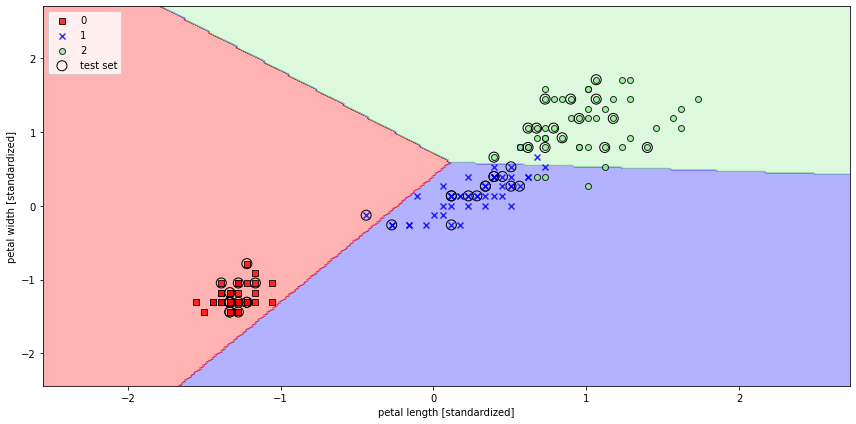

In [8]:
# Treinando um modelo perceptron usando os dados de treinamento padronizados:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(12,6))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

<p align='justify'>Lembrar que o algoritmo <i>perceptron</i> nunca converge em conjuntos de dados que n√£o s√£o perfeitamente separ√°veis linearmente, raz√£o pela qual o uso do algoritmo <i>perceptron</i> normalmente n√£o √© recomendado na pr√°tica.</p>

<h2>Modelando probabilidades de classe por meio de regress√£o log√≠stica</h2>
<p align='justify'>Embora a regra do perceptron ofere√ßa uma introdu√ß√£o agrad√°vel e f√°cil aos algoritmos de aprendizado de m√°quina para classifica√ß√£o, sua maior desvantagem √© que ela nunca converge se as classes n√£o forem perfeitamente separ√°veis linearmente. A tarefa de classifica√ß√£o feita anteriormente seria um exemplo de tal cen√°rio. A raz√£o para isso √© que os pesos est√£o sendo continuamente atualizados, pois sempre h√° pelo menos um exemplo de treinamento mal classificado presente em cada √©poca. Claro que podemos alterar a taxa de aprendizado e aumentar o n√∫mero de √©pocas, mas a ressalva √© que o <i>perceptron</i> nunca convergir√° neste conjunto de dados.</p>
<p align='justify'>Para aproveitar melhor nosso tempo, vamos agora dar uma olhada em outro algoritmo simples, por√©m mais poderoso, para problemas de classifica√ß√£o linear e bin√°ria: <b>regress√£o log√≠stica</b>. Observe que, apesar do nome, a regress√£o log√≠stica √© um modelo de classifica√ß√£o, n√£o de regress√£o.</p>

<h3>Regress√£o log√≠stica e probabilidades condicionais</h3>
<p align='justify'>A regress√£o log√≠stica √© um modelo de classifica√ß√£o muito f√°cil de implementar e funciona muito bem em classes linearmente separ√°veis. √â um dos algoritmos mais utilizados para classifica√ß√£o na ind√∫stria.</p>
<p align='justify'>A regress√£o log√≠stica √© usada na previs√£o do tempo, por exemplo, n√£o apenas para prever se chover√° em um determinado dia, mas tamb√©m para relatar a chance de chuva. Da mesma forma, a regress√£o log√≠stica pode ser usada para prever a chance de um paciente ter uma determinada doen√ßa devido a certos sintomas, raz√£o pela qual a regress√£o log√≠stica goza de grande popularidade no campo da medicina.</p>

<h3>Treinando um modelo de regress√£o log√≠stica com scikit-learn</h3>
<p align='justify'>Vamos aprender como usar a implementa√ß√£o mais otimizada de regress√£o log√≠stica do <i>scikit-learn</i>, que tamb√©m suporta configura√ß√µes multiclasse prontas para uso. Observe que em vers√µes recentes do <i>scikit-learn</i>, a t√©cnica usada para classifica√ß√£o multiclasse, multinomial ou OvR, √© escolhida automaticamente.</p>
<p align="justify">Al√©m disso, definimos <i>multi_class='ovr'</i> para fins de ilustra√ß√£o. Voc√™ pode querer comparar os resultados com <i>multi_class='multinomial'</i>. Observe que a configura√ß√£o multinomial geralmente √© recomendada na pr√°tica para <b>classes mutuamente exclusivas</b>, como aquelas encontradas no conjunto de dados Iris. Aqui, "mutuamente exclusivo" significa que cada exemplo de treinamento s√≥ pode pertencer a uma √∫nica classe (em contraste com a classifica√ß√£o multirr√≥tulo, onde um exemplo de treinamento pode ser membro de v√°rias classes).</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_10140\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


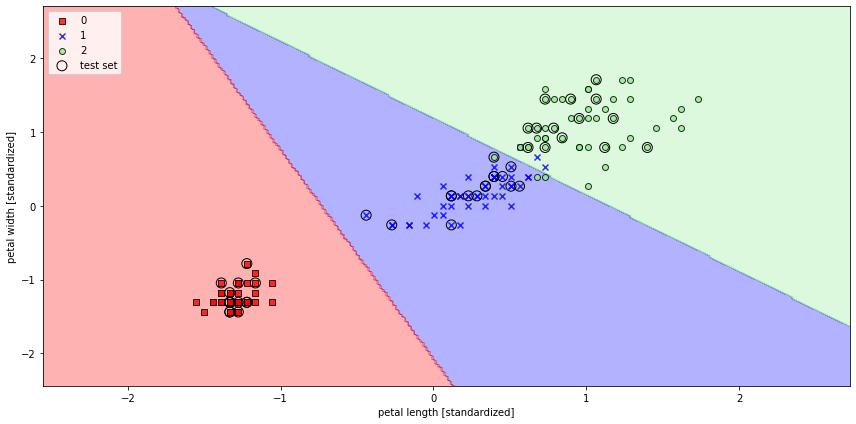

In [9]:
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo.
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

# Treinando os Dados
lr.fit(X_train_std, y_train)

# Plotando os dados
plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='jsustify'>Observe que existem muitos algoritmos de otimiza√ß√£o diferentes para resolver problemas de otimiza√ß√£o. Para minimizar as fun√ß√µes de perda convexa, como a perda na regress√£o log√≠stica, recomenda-se usar abordagens mais avan√ßadas do que o <i>Gradient Descent</i> estoc√°stico regular (SGD). Na verdade, o <i>scikit-learn</i> implementa toda uma gama de tais algoritmos de otimiza√ß√£o, que podem ser especificados atrav√©s do par√¢metro <i>solver</i>, a saber, <i>'newton-cg', 'lbfgs', 'liblinear', 'sag' e 'saga'</i>.</p>

<p align='justify'>A probabilidade de que os exemplos de treinamento perten√ßam a uma determinada classe pode ser calculada usando o m√©todo <i>predict_proba</i>. Por exemplo, podemos prever as probabilidades dos tr√™s primeiros exemplos no conjunto de dados de teste da seguinte forma:</p>

In [10]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [11]:
# A Soma da linha ser√° sempre 1. Que seria igual a 100%.
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [12]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

<p align='justify'>No exemplo de c√≥digo anterior, calculamos as probabilidades condicionais e as convertemos em r√≥tulos de classe manualmente usando a fun√ß√£o <i>argmax</i> do <i>NumPy</i>. Na pr√°tica, a maneira mais conveniente de obter r√≥tulos de classe ao usar o <i>scikit-learn</i> √© chamar o m√©todo de previs√£o diretamente:</p>

In [14]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

<p align='justify'>Por fim, uma palavra de cautela se voc√™ quiser prever o r√≥tulo de classe de um √∫nico exemplo de flor: O <i>scikit-learn</i> espera um array bidimensional como entrada de dados; portanto, primeiro temos que converter uma √∫nica fatia de linha em tal formato. Uma maneira de converter uma √∫nica entrada de linha em uma matriz de dados bidimensional √© usar o m√©todo <i>reshape</i> do <i>NumPy</i> para adicionar uma nova dimens√£o, como demonstrado aqui:</p>

In [13]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

<h3>Combatendo o overfitting via regulariza√ß√£o</h3>
<p align='justify'>O <i>overfitting</i> √© um problema comum em aprendizado de m√°quina, onde um modelo funciona bem em dados de treinamento, mas n√£o generaliza bem para dados n√£o vistos (dados de teste). Se um modelo sofre de <i>overfitting</i>, tamb√©m dizemos que o modelo tem uma alta vari√¢ncia, que pode ser causada por ter muitos par√¢metros, levando a um modelo muito complexo devido aos dados subjacentes. Da mesma forma, nosso modelo tamb√©m pode sofrer de <i>underfitting</i> (alto vi√©s), o que significa que nosso modelo n√£o √© complexo o suficiente para capturar bem o padr√£o nos dados de treinamento e, portanto, tamb√©m sofre de baixo desempenho em dados n√£o vistos.</p>

<h4>O tradeoff vi√©s-vari√¢ncia</h4>
<p align='justify'>Freq√ºentemente, os pesquisadores usam os termos "vi√©s" e "vari√¢ncia" ou "compensa√ß√£o de vi√©s-vari√¢ncia" para descrever o desempenho de um modelo - ou seja, voc√™ pode trope√ßar em palestras, livros ou artigos em que as pessoas dizem que um modelo tem um " alta vari√¢ncia" ou "alto vi√©s". Ent√£o, o que isso significa? Em geral, podemos dizer que "alta vari√¢ncia" √© proporcional ao <i>overfitting</i> e "alto vi√©s" √© proporcional ao <i>underfitting</i>.</p>
<p align='justify'>No contexto de modelos de aprendizado de m√°quina, a vari√¢ncia mede a consist√™ncia (ou variabilidade) da previs√£o do modelo para classificar um exemplo espec√≠fico se treinarmos novamente o modelo v√°rias vezes, por exemplo, em diferentes subconjuntos do conjunto de dados de treinamento. Podemos dizer que o modelo √© sens√≠vel √† aleatoriedade nos dados de treinamento. Em contraste, o vi√©s mede o qu√£o longe as previs√µes est√£o dos valores corretos, em geral, se reconstruirmos o modelo v√°rias vezes em diferentes conjuntos de dados de treinamento; vi√©s √© a medida do erro sistem√°tico que n√£o √© devido √† aleatoriedade.</p>

<p align=justify'>Um forma de encontrar um bom vi√©s-vari√¢ncia √© ajustar a complexidade o modelo via regulariza√ß√£o. A regulariza√ß√£o √© util para lidar com a famosa colinearidade, em outras palavras, alta correla√ß√£o entre as <i>features</i>, filtrando os ru√≠dos dos dados e eventualmente prevenindo o <i>overfitting</i>.

<h4>Regulariza√ß√£o e Normaliza√ß√£o de Recursos</h4>
<p align='justify'>A regulariza√ß√£o √© outra raz√£o pela qual o dimensionamento de recursos, como a padroniza√ß√£o, √© importante. Para que a regulariza√ß√£o funcione corretamente, precisamos garantir que todos os nossos recursos estejam em escalas compar√°veis.</p>

<h3>Classifica√ß√£o m√°xima de margem com m√°quinas de vetor de suporte (SVM)</h3>
<p align='justify'>Outro algoritmo de aprendizado poderoso e amplamente utilizado √© o <i>Support Vector Machine</i> (SVM), que pode ser considerada uma extens√£o do <i>perceptron</i>. Usando o algoritmo <i>perceptron</i>, minimizamos os erros de classifica√ß√£o. No entanto, nos SVMs o nosso objetivo de otimiza√ß√£o √© maximizar a margem. A margem √© definida como a dist√¢ncia entre o hiperplano de separa√ß√£o (limite de decis√£o) e os exemplos de treinamento mais pr√≥ximos deste hiperplano, que s√£o os chamados vetores de suporte.</p>

<h4>Lidando com um caso n√£o linearmente separ√°vel usando vari√°veis de folga</h4>
<p align='justify'>Embora n√£o queiramos nos aprofundar muito nos conceitos matem√°ticos mais envolvidos por tr√°s da classifica√ß√£o de margem m√°xima, vamos mencionar brevemente a vari√°vel de folga, ùúâùúâ , que foi introduzida por <i>Vladimir Vapnik</i> em 1995 e levou √† chamada margem suave classifica√ß√£o. A motiva√ß√£o para a introdu√ß√£o da vari√°vel </i>slack</i> foi que as restri√ß√µes lineares precisam ser relaxadas para dados n√£o linearmente separ√°veis para permitir a converg√™ncia da otimiza√ß√£o na presen√ßa de erros de classifica√ß√£o, sob a penaliza√ß√£o de custo adequada.</p>

<p align='justify'>Por meio da vari√°vel C, podemos controlar a penalidade por classifica√ß√£o incorreta. Grandes valores de C correspondem a grandes penalidades de erro, enquanto somos menos rigorosos quanto a erros de classifica√ß√£o se escolhermos valores menores para C. Podemos ent√£o usar o par√¢metro C para controlar a largura da margem e, portanto, ajustar a compensa√ß√£o entre vi√©s e vari√¢ncia. Esse conceito est√° relacionado √† regulariza√ß√£o, que discutimos na se√ß√£o anterior no contexto da regress√£o regularizada, onde diminuir o valor de C aumenta o vi√©s e diminui a vari√¢ncia do modelo.</p>



C:\Users\willi\AppData\Local\Temp\ipykernel_10140\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


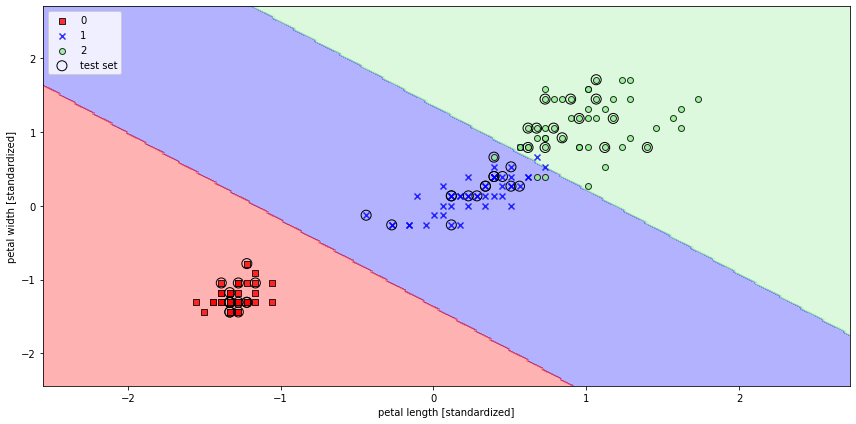

In [15]:
from sklearn.svm import SVC

# Instanciando um Modelo SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)

# Ajustando e treinando o Modelo
svm.fit(X_train_std, y_train)

# Plotando os dados

plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<h4>Regress√£o log√≠stica versus SVMs</h4>

<p align='justify'>Em tarefas pr√°ticas de classifica√ß√£o, regress√£o log√≠stica linear e SVMs lineares geralmente produzem resultados muito semelhantes. A regress√£o log√≠stica tenta maximizar as probabilidades condicionais dos dados de treinamento, o que os torna mais propensos a <i>outliers</i> do que os SVMs, que se preocupam principalmente com os pontos mais pr√≥ximos do limite de decis√£o (vetores de suporte). Por outro lado, a regress√£o log√≠stica tem a vantagem de ser um modelo mais simples e poder ser implementado com mais facilidade. Al√©m disso, os modelos de regress√£o log√≠stica podem ser facilmente atualizados, o que √© atraente quando se trabalha com dados de <i>streaming</i>.</p>

<h3>Implementa√ß√µes alternativas no scikit-learn</h3>